In [1]:
# Setup for Google Colab (optional)
import sys
if 'google.colab' in sys.modules:
    print("Running in Google Colab")
    # Install required packages
    !pip install -q py4DSTEM hyperspy scikit-image matplotlib numpy scipy

    # Clone the repository to access data
    !git clone -q https://github.com/NU-MSE-LECTURES/465-WINTER2026.git
    import os
    os.chdir('/content/465-WINTER2026')

    # Set up file handling
    from google.colab import files
    print("Colab setup complete!")
else:
    print("Running in local environment")

Running in Google Colab
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.11 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.13.0.9

<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_02/assignments/assignment_02_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02: 4D-STEM Foundations

Complete this assignment to demonstrate your understanding of 4D-STEM data analysis and calibration.


In [2]:
# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

Running in Google Colab. Installing requirements...
fatal: destination path '465_Computational_Microscopy_2026' already exists and is not an empty directory.
Setup complete.


## Task 1: Distinguish Navigation vs. Signal Axes

In your notebook, define the "Navigation Axes" (where the measurement is made, e.g., x, y scan positions).

Define the "Signal Axes" (what is measured at each point, e.g., an EELS spectrum or a 2D diffraction pattern).

Use signal.axes manager to print and verify the dimensionality of a 4D-STEM dataset (expected: 2 Navigation, 2 Signal).

In [5]:
import hyperspy.api as hs
import numpy as np

# Load the 4D-STEM data using HyperSpy
Si_Au = "/content/465-WINTER2026/Week_02/assignments/raw_data/Diffraction SI_Au_Calib.dm4"
Si_SiGe = "/content/465-WINTER2026/Week_02/assignments/raw_data/Si-SiGe.dm4"
signal = hs.load(Si_SiGe)

# Access the axes_manager
axes_mgr = signal.axes_manager

# Print full axes information
print("4D-STEM Dataset Axes Information")
print(axes_mgr)
print()

# Navigation Axes (where the measurement is made: x, y scan positions)
nav_axes = axes_mgr.navigation_axes
print(f"Number of Navigation Axes: {len(nav_axes)}")
print("Navigation Axes (Scan Positions):")
for i, ax in enumerate(nav_axes):
    print(f"  Axis {i}: {ax.name if ax.name else 'Unnamed'}")
    print(f"    Size: {ax.size}")
    print(f"    Scale: {ax.scale} {ax.units if ax.units else ''}")
    print(f"    Offset: {ax.offset}")
print()

# Signal Axes (what is measured at each point: 2D diffraction pattern)
sig_axes = axes_mgr.signal_axes
print(f"Number of Signal Axes: {len(sig_axes)}")
print("Signal Axes (Diffraction Pattern):")
for i, ax in enumerate(sig_axes):
    print(f"  Axis {i}: {ax.name if ax.name else 'Unnamed'}")
    print(f"    Size: {ax.size}")
    print(f"    Scale: {ax.scale} {ax.units if ax.units else ''}")
    print(f"    Offset: {ax.offset}")
print()

# Verify expected 4D-STEM structure (2 Navigation + 2 Signal)
if len(nav_axes) == 2 and len(sig_axes) == 2:
    print("Dataset structure verified: 2 Navigation axes and 2 Signal axes")
    print("This is a valid 4D-STEM dataset.")
else:
    print(f"Expected 2 navigation and 2 signal axes")
    print(f"Found {len(nav_axes)} navigation and {len(sig_axes)} signal axes")

4D-STEM Dataset Axes Information
<Axes manager, axes: (448, 480|17, 77)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               z |    448 |      0 |       0 |   0.062 |   1/nm 
     <undefined> |    480 |      0 |       0 |   0.062 |   1/nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
               x |     17 |      0 |       0 |       2 |     nm 
               y |     77 |      0 |       0 |       2 |     nm 

Number of Navigation Axes: 2
Navigation Axes (Scan Positions):
  Axis 0: z
    Size: 448
    Scale: 0.06208537146449089 1/nm
    Offset: 0.0
  Axis 1: <undefined>
    Size: 480
    Scale: 0.06208537146449089 1/nm
    Offset: 0.0

Number of Signal Axes: 2
Signal Axes (Diffraction Pattern):
  Axis 0: x
    Size: 17
    Scale: 2.0 nm
    Offset: 0.0
  Axis 1: y
    Size: 77
    Scale: 2.0 nm
    Offset: 0.0

Dataset structure verified: 2 Navigation axes and 2 Signal axe

## Task 2: Load and Calibrate 4D-STEM Data

Use py4DSTEM.io.read to load a 4D-STEM dataset (e.g., .dm4 or .h5).

**Note:** The dataset Si-SiGe.dm4 should be available in the raw_data folder.

Set the scan step size (real space calibration) using dataset.set_scan_step_size().

Perform Center of Mass (CoM) correction using dataset.get_diffraction_shifts() to center the unscattered beam.

Dataset loaded
Dataset shape: (480, 448, 77, 17)
Navigation shape (scan positions): (480, 448)
Signal shape (diffraction pattern): (77, 17)

Scan step size set to: 1.0 nm

Performing Center of Mass correction...


Finding origins: 100%|██████████| 215k/215k [02:18<00:00, 1.55kDP/s]


  Mean beam position: (37.48, 7.90)
  Beam shift range X: 9.37 to 69.72 pixels
  Beam shift range Y: 7.12 to 8.86 pixels



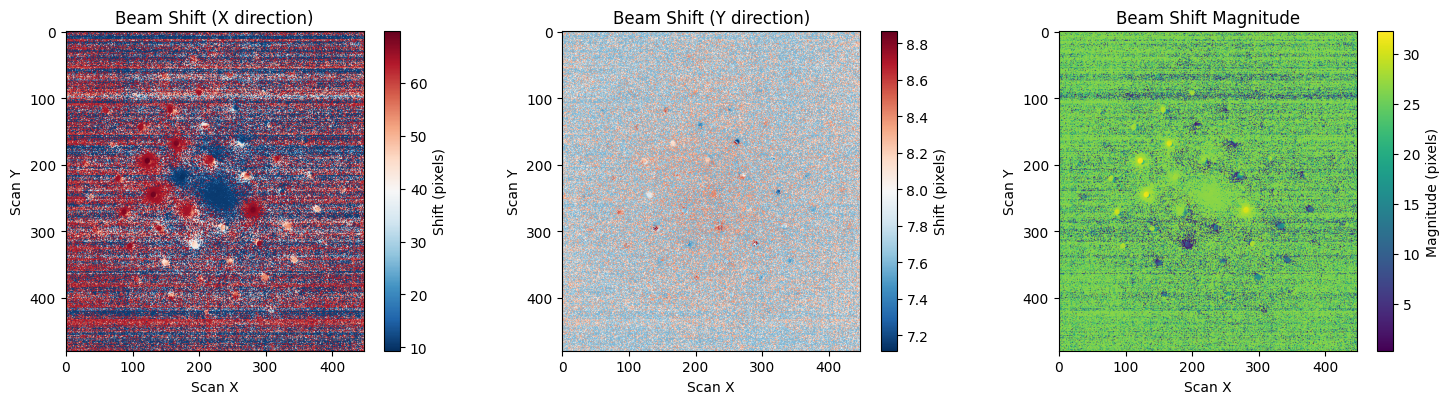

Calibration complete


In [9]:
import py4DSTEM
import matplotlib.pyplot as plt
import numpy as np

Si_SiGe = "/content/465-WINTER2026/Week_02/assignments/raw_data/Si-SiGe.dm4"

# Load the dataset
# If loading .dm4 file, use:
dataset = py4DSTEM.import_file(Si_SiGe, mem='RAM')

# If loading .h5 file, use:
# dataset = py4DSTEM.read(file_path)

print("Dataset loaded")
print(f"Dataset shape: {dataset.data.shape}")
print(f"Navigation shape (scan positions): {dataset.Rshape}")
print(f"Signal shape (diffraction pattern): {dataset.Qshape}")
print()

# Set the scan step size (real space calibration)
# This calibrates the real-space pixel size in nm
scan_step_size_nm = 1.0  # Adjust based on your experimental parameters
dataset.calibration.set_R_pixel_size(scan_step_size_nm)
dataset.calibration.set_R_pixel_units('nm')

print(f"Scan step size set to: {scan_step_size_nm} nm")
print()

# Perform Center of Mass (CoM) correction to find beam shifts
# This locates the center of the unscattered beam at each scan position
print("Performing Center of Mass correction...")

# Method 1: Use get_origin to find the beam center
# This method works well when the central beam is the brightest feature
from py4DSTEM.process.calibration import get_origin

# Get the origin (beam center) for all diffraction patterns
# We capture all return values (likely x, y, and intensity) and select the first two
origin_results = get_origin(
    dataset,
    r=None,  # Auto-detect probe size
    rscale=1.2  # Scale factor for center of mass calculation
)

# Extract x and y shifts
qx0 = origin_results[0]
qy0 = origin_results[1]

# Store the beam positions in the calibration
dataset.calibration.set_origin((qx0, qy0))

print(f"  Mean beam position: ({np.mean(qx0):.2f}, {np.mean(qy0):.2f})")
print(f"  Beam shift range X: {np.min(qx0):.2f} to {np.max(qx0):.2f} pixels")
print(f"  Beam shift range Y: {np.min(qy0):.2f} to {np.max(qy0):.2f} pixels")
print()

# Visualize the beam shift map
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot X beam shifts
im0 = axes[0].imshow(qx0, cmap='RdBu_r')
axes[0].set_title('Beam Shift (X direction)')
axes[0].set_xlabel('Scan X')
axes[0].set_ylabel('Scan Y')
plt.colorbar(im0, ax=axes[0], label='Shift (pixels)')

# Plot Y beam shifts
im1 = axes[1].imshow(qy0, cmap='RdBu_r')
axes[1].set_title('Beam Shift (Y direction)')
axes[1].set_xlabel('Scan X')
axes[1].set_ylabel('Scan Y')
plt.colorbar(im1, ax=axes[1], label='Shift (pixels)')

# Plot beam shift magnitude
shift_magnitude = np.sqrt((qx0 - np.mean(qx0))**2 + (qy0 - np.mean(qy0))**2)
im2 = axes[2].imshow(shift_magnitude, cmap='viridis')
axes[2].set_title('Beam Shift Magnitude')
axes[2].set_xlabel('Scan X')
axes[2].set_ylabel('Scan Y')
plt.colorbar(im2, ax=axes[2], label='Magnitude (pixels)')

plt.tight_layout()
plt.savefig('beam_shift_calibration.png', dpi=150, bbox_inches='tight')
plt.show()

print("Calibration complete")

## Task 3: Virtual Detector Reconstruction

Generate a Virtual Bright Field (BF) image by integrating the central transmitted disk.

Generate an Annular Dark Field (ADF) image by integrating the scattered electrons in an outer ring.

Compare the Z-contrast in the ADF image to the diffraction contrast in the BF image.

Center (x,y): (8.0, 38.0)
Radii: BF=0-20.0, ADF=25.0-60.0


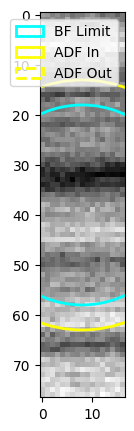

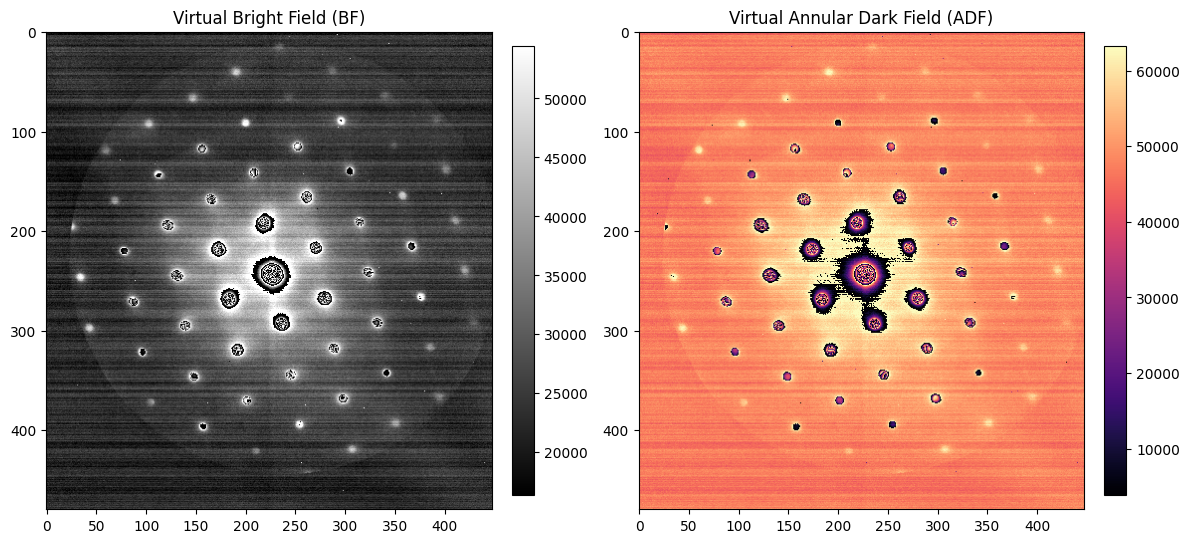

In [20]:
# --- Task 3: Virtual Detector Reconstruction (Robust Version) ---
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# 1. Calculate Mean Diffraction Pattern to find the static center
# This is more robust than per-pixel shifts for basic visualization
data4d = dataset.data
R_Nx, R_Ny = dataset.Rshape
Q_Ny, Q_Nx = dataset.Qshape
dp_mean = data4d.reshape(-1, Q_Ny, Q_Nx).mean(axis=0)

# Simple Center of Mass of the Mean DP
y_grid, x_grid = np.indices((Q_Ny, Q_Nx))
total_intensity = dp_mean.sum()
center_x = (x_grid * dp_mean).sum() / total_intensity
center_y = (y_grid * dp_mean).sum() / total_intensity

# 2. Define Radii
# Adjust these based on the visual output if needed
r_probe = 20.0  # Approx radius of the central bright disk
r_bf = 20.0     # BF: Integrate INSIDE the disk
r_adf_in = 25.0 # ADF: Start OUTSIDE the disk (gap of 5px)
r_adf_out = 60.0 # ADF: End further out to capture more signal

print(f"Center (x,y): ({center_x:.1f}, {center_y:.1f})")
print(f"Radii: BF=0-{r_bf}, ADF={r_adf_in}-{r_adf_out}")

# 3. Diagnostic Plot: Check alignment
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.log(dp_mean + 1), cmap='gray') # Log scale to see weak spots
ax.add_patch(Circle((center_x, center_y), r_bf, edgecolor='cyan', facecolor='none', lw=2, label='BF Limit'))
ax.add_patch(Circle((center_x, center_y), r_adf_in, edgecolor='yellow', facecolor='none', lw=2, label='ADF In'))
ax.add_patch(Circle((center_x, center_y), r_adf_out, edgecolor='yellow', facecolor='none', lw=2, linestyle='--', label='ADF Out'))
ax.legend(loc='upper right')
plt.show()

# 4. Integrate Virtual Images (Static Mask)
# Create distance map from the static center
rr = np.sqrt((x_grid - center_x)**2 + (y_grid - center_y)**2)

# Create masks
mask_bf = rr <= r_bf
mask_adf = (rr >= r_adf_in) & (rr <= r_adf_out)

# Flatten and integrate
# Reshape data to (N_scan_positions, Q_Ny, Q_Nx)
dp_flat = data4d.reshape(R_Nx * R_Ny, Q_Ny, Q_Nx)

# Summing using matrix multiplication is faster/cleaner for static masks
# Flatten masks to 1D
flat_mask_bf = mask_bf.flatten()
flat_mask_adf = mask_adf.flatten()
flat_dp = dp_flat.reshape(R_Nx * R_Ny, -1)

# Integrate
bf_vector = flat_dp @ flat_mask_bf
adf_vector = flat_dp @ flat_mask_adf

# Reshape to scan grid
bf_image = bf_vector.reshape(R_Nx, R_Ny)
adf_image = adf_vector.reshape(R_Nx, R_Ny)

# 5. Plot with Robust Contrast (Percentiles)
# This fixes the "black image" issue caused by hot pixels
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# BF Image
vmin_bf, vmax_bf = np.percentile(bf_image, [1, 99])
im0 = axes[0].imshow(bf_image, cmap='gray', vmin=vmin_bf, vmax=vmax_bf)
axes[0].set_title("Virtual Bright Field (BF)")
plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

# ADF Image
vmin_adf, vmax_adf = np.percentile(adf_image, [1, 99])
im1 = axes[1].imshow(adf_image, cmap='magma', vmin=vmin_adf, vmax=vmax_adf)
axes[1].set_title("Virtual Annular Dark Field (ADF)")
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


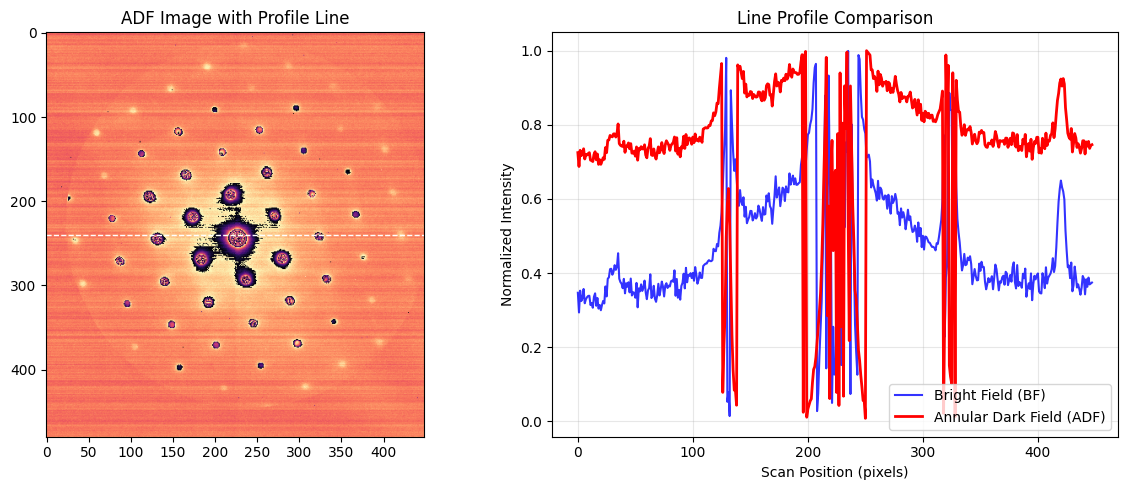

ADF (Red): Intensity should be higher in the heavier region (SiGe > Si).
BF (Blue): Contrast is often inverted or complex due to diffraction.


In [24]:
def normalize(img):
    return (img - img.min()) / (img.max() - img.min())

bf_norm = normalize(bf_image)
adf_norm = normalize(adf_image)

mid_y = bf_image.shape[0] // 2
profile_bf = bf_norm[mid_y, :]
profile_adf = adf_norm[mid_y, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.imshow(adf_norm, cmap='magma')
ax1.axhline(mid_y, color='white', linestyle='--', linewidth=1)
ax1.set_title("ADF Image with Profile Line")

ax2.plot(profile_bf, label='Bright Field (BF)', color='blue', alpha=0.8)
ax2.plot(profile_adf, label='Annular Dark Field (ADF)', color='red', linewidth=2)
ax2.set_title("Line Profile Comparison")
ax2.set_xlabel("Scan Position (pixels)")
ax2.set_ylabel("Normalized Intensity")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("ADF (Red): Intensity should be higher in the heavier region (SiGe > Si).")
print("BF (Blue): Contrast is often inverted or complex due to diffraction.")


## Task 4: Basic 4D-STEM Visualization

Launch the interactive 4D-STEM browser using dataset.show() (if using a local GUI) or py4D.show_image().

Export a publication-quality figure of a virtual ADF image with a scale bar and a perceptually uniform colormap (e.g., magma).

Interactive browser could not launch (expected in some Colab/Headless envs): 'DataCube' object has no attribute 'show'
Scale bar: 20 nm = 20.0 pixels
Figure saved to virtual_adf_figure_sisige.png


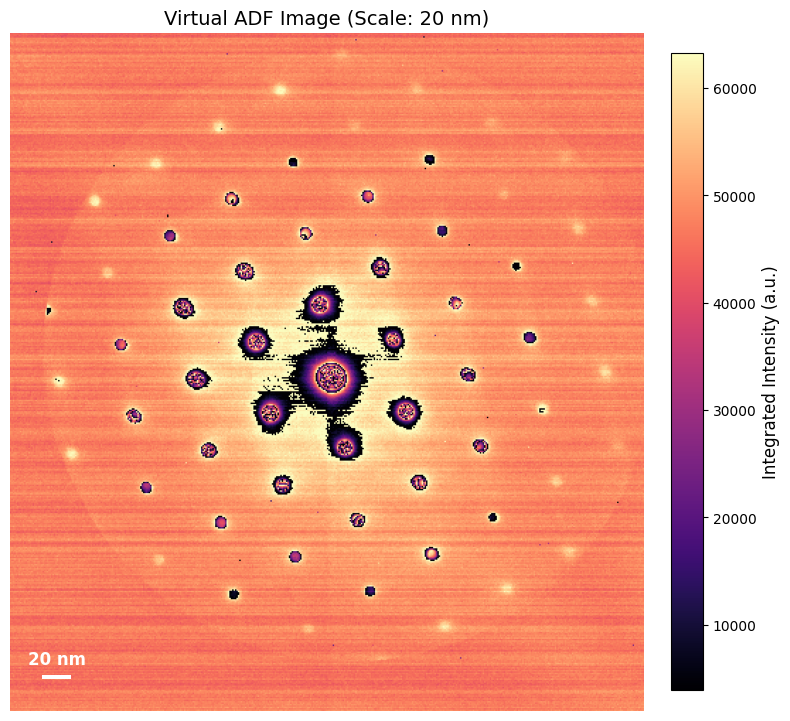

NameError: name 'scale_bar_length' is not defined

In [27]:
# --- Task 4: Basic 4D-STEM Visualization ---

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# 1. Launch Interactive Browser (optional, depends on environment)
try:
    dataset.show()  # Opens py4DSTEM browser widget if supported
except Exception as e:
    print(f"Interactive browser could not launch (expected in some Colab/Headless envs): {e}")

# 2. Export Publication-Quality Figure (Virtual ADF)

# Define Scale Bar Parameters
pixel_size_nm = dataset.calibration.get_R_pixel_size() # Retrieve size set in Task 2 (1.0 nm)
if pixel_size_nm is None:
    pixel_size_nm = 1.0 # Fallback if not set
    print("Warning: Pixel size not found in calibration, using default 1.0 nm.")

target_bar_length_nm = 20 # Desired scale bar length in nm
scale_bar_pixels = target_bar_length_nm / pixel_size_nm

# Check if bar fits, otherwise resize
if scale_bar_pixels > adf_image.shape[1] * 0.5:
    target_bar_length_nm = 10
    scale_bar_pixels = target_bar_length_nm / pixel_size_nm

print(f"Scale bar: {target_bar_length_nm} nm = {scale_bar_pixels:.1f} pixels")

# Create Figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot ADF Image (using robust contrast limits from Task 3)
vmin, vmax = np.percentile(adf_image, [1, 99])
im = ax.imshow(adf_image, cmap='magma', vmin=vmin, vmax=vmax)

# Remove axes ticks for clean look
ax.axis('off')
ax.set_title(f'Virtual ADF Image (Scale: {target_bar_length_nm} nm)', fontsize=14)

# Add Scale Bar (Bottom Left)
# Position: 5% padding from bottom-left corner
margin_x = adf_image.shape[1] * 0.05
margin_y = adf_image.shape[0] * 0.05
bar_x = margin_x
bar_y = adf_image.shape[0] - margin_y - 2 # 2 pixels up from bottom margin

# Draw Bar (White Rectangle)
rect = Rectangle((bar_x, bar_y), scale_bar_pixels, 3, # 3 pixels height
                 linewidth=0, edgecolor='none', facecolor='white')
ax.add_patch(rect)

# Add Text Label above bar
ax.text(bar_x + scale_bar_pixels/2, bar_y - 5, f'{target_bar_length_nm} nm',
        color='white', fontsize=12, fontweight='bold', ha='center', va='bottom')

# Add Colorbar (fraction/pad adjusts size to match image height)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Integrated Intensity (a.u.)', fontsize=12)

plt.tight_layout()

# Save and Show
save_path = 'virtual_adf_figure_sisige.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {save_path}")
plt.show()


#=======
from matplotlib.patches import Rectangle
if scale_bar_pixels < adf_image.shape[1] - 5:
    # Position scale bar in bottom-left corner
    bar_x, bar_y = 2, adf_image.shape[0] - 4
    scale_bar = Rectangle((bar_x, bar_y), scale_bar_pixels, 1, fill=True, color='white', linewidth=1)
    ax.add_patch(scale_bar)
    ax.text(bar_x + scale_bar_pixels/2, bar_y - 1, f'{scale_bar_length} nm', ha='center', va='top',
            color='white', fontsize=10, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Integrated Intensity (a.u.)', fontsize=12)

plt.tight_layout()
plt.savefig('virtual_adf_figure_sisige.png', dpi=300, bbox_inches='tight')
plt.show()

## Task 5: Finalize and Submit

Update your README.md with a brief explanation of how virtual detectors allow post-acquisition imaging.

Push the completed Week 02 notebook to your GitHub repository.

Submit the repository link on Canvas.

In [ ]:
# Your code here